In [ ]:

!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import praw
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 1: Initialize PRAW (Reddit API)
reddit = praw.Reddit(
    client_id='7I8oVEnbAAa9nUYlyufYvA',  # Replace with your client ID
    client_secret='rhxvPUUs3XTkP10joVtfgIY1lCJkAw',  # Replace with your client secret
    user_agent='BrandSentimentAnalysisApp'  # Replace with your user agent string
)

In [ ]:
# Step 2: Choose a subreddit and the keyword (brand name or topic)
subreddit_name = 'all'  # Search in all subreddits
keyword = 'Oppo'  # Replace this with the brand or keyword you're analyzing

In [ ]:
# Step 3: Scrape Reddit Posts
posts = []
for submission in reddit.subreddit(subreddit_name).search(keyword, limit=10):  # Limit number of posts to scrape
    posts.append({
        'title': submission.title,
        'selftext': submission.selftext,
        'url': submission.url,
        'created': submission.created_utc
    })

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [ ]:
# Step 4: Sentiment Analysis using VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

results = []

for post in posts:
    title_sentiment = analyzer.polarity_scores(post['title'])['compound']
    text_sentiment = analyzer.polarity_scores(post['selftext'])['compound']

    # Average sentiment of both title and selftext
    avg_sentiment = (title_sentiment + text_sentiment) / 2

    results.append({
        'title': post['title'],
        'selftext': post['selftext'],
        'url': post['url'],
        'created': post['created'],
        'sentiment_score': avg_sentiment
    })


In [ ]:
# Step 5: Convert the results to a Pandas DataFrame
df = pd.DataFrame(results)


In [ ]:
# Step 6: Display the DataFrame
print(df)

                                               title  \
0          Oppo isn’t even trying to hide it anymore   
1                          Why choose OP over Oppo?    
2                            Oppo Find X8 Pro review   
3  Seriously OnePlus/Oppo, what the hell are you ...   
4                 Why are Oppo phones so unrootable?   
5  The wait is over — OPPO's Find X8 and X8 Pro a...   
6  OPPO and realme Respond to Pre-installed Loan ...   
7      The Oppo roll screen smartphone is so smooth!   
8  [Ouzia] NFL has announced this year's Internat...   
9                              Oppo new 240W charger   

                                            selftext  \
0                                                      
1  Historically, OnePlus was cheaper,  had better...   
2                                                      
3  I'm disappointed. The .830 update really messe...   
4  Is there any hope in rooting Oppo Reno 6 CPH22...   
5                                              

In [ ]:
# Optionally: Save the data to a CSV file
df.to_csv('reddit_sentiment_analysis.csv', index=False)

In [ ]:
# Step 7: Analyze sentiment distribution
positive = len(df[df['sentiment_score'] > 0.1])
negative = len(df[df['sentiment_score'] < -0.1])
neutral = len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])

print(f"Positive Sentiment Posts: {positive}")
print(f"Negative Sentiment Posts: {negative}")
print(f"Neutral Sentiment Posts: {neutral}")

Positive Sentiment Posts: 3
Negative Sentiment Posts: 2
Neutral Sentiment Posts: 5


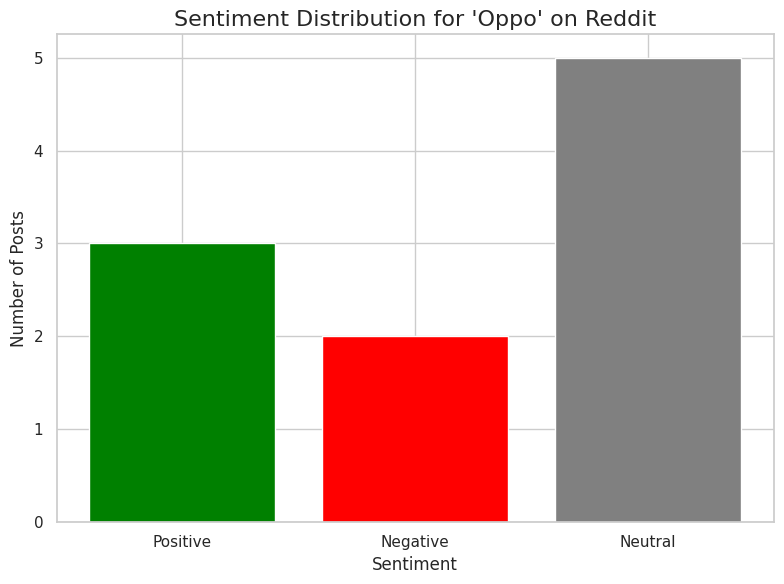

In [ ]:
# Create a bar chart
import matplotlib.pyplot as plt
import seaborn as sns # This line imports seaborn and assigns it the alias 'sns'
# Prepare sentiment distribution data
sentiment_counts = {
    'Positive': positive,
    'Negative': negative,
    'Neutral': neutral
}

# Step 8: Visualize Sentiment Distribution (Bar Chart)
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart: labels and values
ax.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'red', 'gray'])

# Title and labels
ax.set_title(f"Sentiment Distribution for '{keyword}' on Reddit", fontsize=16)
ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Number of Posts", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()